<center> <h1> 600092 <br>  Data Mining and Decision Systems </h1> </center>

---

#### Importing necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from statistics import variance

from IPython.display import Image  

import pydotplus

import matplotlib.pyplot as plt
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix

%matplotlib inline

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import warnings # This just hides warnings for imports that will be depreciated in the future
warnings.filterwarnings('ignore') 

#### Importing dataset and creating a copy of the dataset.

In [3]:
non_standard_vals = ["na", "n/a", "--", " "] # This array contains non standard values that the dataframe may contain. 
df = pd.read_csv('600092_data.csv', na_values=non_standard_vals) # The na_values param takes the array above and changes them to standard null values. 

Also here, using na_values, this checks if there's any non-standard null values such as `na, n/a, --, " "` in the dataset, then in the import, those values are replaced with correct standard null values.

<center><h2> 1.0.0 Data Understanding </h2></center> 

 #### 1.0 Making sure the data has been correctly imported

In [4]:
df.head() # Grabs the first 5 entities

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk


figure 1.0 - First Five Entities

### 1.1 Dataframe information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
Random          1520 non-null float64
Id              1520 non-null int64
Indication      1517 non-null object
Diabetes        1518 non-null object
IHD             1520 non-null object
Hypertension    1517 non-null object
Arrhythmia      1520 non-null object
History         1518 non-null object
IPSI            1516 non-null float64
Contra          1519 non-null float64
label           1517 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 130.8+ KB


Figure 1.1.0

Using `df.info()` to briefly summarise the dataset, to better understand the data.

This shows how many data entities there are, and the different data types.

<center> <h2>2.0 - Minimal Data Cleaning </h2> </center>
<hr>

#### 2.0.1 - Creating DataFrame Copy

In [6]:
minimal_patient_df = df.copy()

#### 2.1 - Dropping Null Values

In [7]:
minimal_patient_df.dropna(inplace = True)

#### 2.2 - Checking for Unique Values

In [8]:
minimal_patient_df.nunique()

Random          1211
Id              1502
Indication         5
Diabetes           2
IHD                2
Hypertension       2
Arrhythmia         2
History            2
IPSI              29
Contra            25
label              3
dtype: int64

#### 2.3 - Finding Unknown within DataFrame  

In [9]:
minimal_patient_df['label'].value_counts()

NoRisk     1000
Risk        500
Unknown       2
Name: label, dtype: int64

#### 2.4 - Mapping and Dummies

In [10]:
unknown_index = minimal_patient_df [minimal_patient_df ["label"] == "Unknown" ].index
minimal_patient_df.drop(unknown_index , inplace=True)

minimal_patient_df = pd.get_dummies(minimal_patient_df, columns = ["Indication", "Diabetes", "IHD", "Hypertension", "Arrhythmia", "History"])
minimal_patient_df["label"] = minimal_patient_df["label"].map({"Risk":1 , "NoRisk":0})

In [11]:
minimal_patient_df

,Random,Id,IPSI,Contra,label,Indication_A-F,Indication_ASx,Indication_Asx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes
0,0.602437,218242,78.0,20.0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
1,0.602437,159284,70.0,60.0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
2,0.602437,106066,95.0,40.0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
3,0.128157,229592,90.0,85.0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0
4,0.676862,245829,70.0,20.0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,76.0,60.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0
1516,0.253504,121814,90.0,75.0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0
1517,0.620373,101754,75.0,20.0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0
1518,0.639342,263836,70.0,45.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [12]:
minimal_patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1519
Data columns (total 20 columns):
Random              1500 non-null float64
Id                  1500 non-null int64
IPSI                1500 non-null float64
Contra              1500 non-null float64
label               1500 non-null int64
Indication_A-F      1500 non-null uint8
Indication_ASx      1500 non-null uint8
Indication_Asx      1500 non-null uint8
Indication_CVA      1500 non-null uint8
Indication_TIA      1500 non-null uint8
Diabetes_no         1500 non-null uint8
Diabetes_yes        1500 non-null uint8
IHD_no              1500 non-null uint8
IHD_yes             1500 non-null uint8
Hypertension_no     1500 non-null uint8
Hypertension_yes    1500 non-null uint8
Arrhythmia_no       1500 non-null uint8
Arrhythmia_yes      1500 non-null uint8
History_no          1500 non-null uint8
History_yes         1500 non-null uint8
dtypes: float64(3), int64(2), uint8(15)
memory usage: 92.3 KB


<center> <h2>3.0 - Extensive Data Cleaning </h2> </center>
<hr>

#### 3.0.1 - Creating DataFrame Copy 

In [13]:
extentive_patient_df = df.copy()

#### 3.1 - Checking for null values

In [14]:
extentive_patient_df .isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           3
dtype: int64

This shows the amount of null values each column has, therefore as decision could be made to either fill the values in or drop them entirely. 

As shown there is 18 NaN values.

#### 3.1.1 - Visualisation of Null value placements

In [15]:
display_nulls = extentive_patient_df [extentive_patient_df .isna().any(axis=1)]

display_nulls

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90.0,Risk
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50.0,NoRisk
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40.0,NoRisk
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100.0,Risk
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,NaN,NoRisk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40.0,NoRisk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30.0,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100.0,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100.0,Risk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100.0,Risk


#### 3.1.2 - Pie chart of null values in percentages

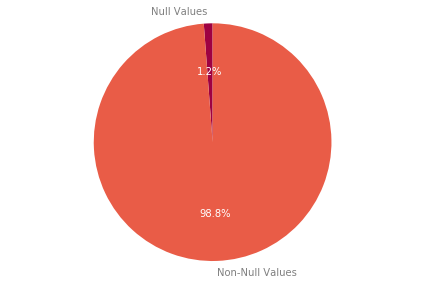

In [16]:
amount_of_nulls = extentive_patient_df .isnull().values.sum()
amount_of_non_nulls = len(extentive_patient_df ) - amount_of_nulls

labels = 'Null Values', 'Non-Null Values'
sizes = [amount_of_nulls, amount_of_non_nulls]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

Only 1.2% of the data is null values as the pie chart shows. 

This shows all the null values within the data, this makes it useful to give context where the null values are relation to the data. 

**Now a decision can be made either to drop the values or fill them in.**

As there is only 18 data entities that contain `NaN` values which makes up 1.2% of data set, filling in the data values with either a `fillna(ffill)` or `fillna(bfill` may skew any visualisation of the results or any models that will be made in the future, possibly incorrectly training the models. 

Along with this, the context of the data is whether a patient is at risk or not of death regarding all the possible health issues they may or may not have, which either a forward fill or backwards fill could incorrectly label them which would could cause issues later down the line, especially with training a model. 

Therefore, it will be better practise to drop the `NaN` values.

#### 3.1.3 - Dropping Null Values

In [17]:
extentive_patient_df .dropna(inplace=True)

In [18]:
extentive_patient_df .isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

As we can see all the `NaN` values have been dropped, and progress can be made. 

#### 3.2 - Column Naming

The column names such as label aren't very descriptive of the data the column contains, so it would be adviable to rename that column to something like `mortatliy`

In [19]:
extentive_patient_df .rename(columns={'label': 'Mortality'}, inplace = True)

In [20]:
extentive_patient_df ["Mortality"]

0       NoRisk
1       NoRisk
2         Risk
3         Risk
4       NoRisk
         ...  
1515    NoRisk
1516      Risk
1517    NoRisk
1518    NoRisk
1519    NoRisk
Name: Mortality, Length: 1502, dtype: object

This column name now gives a somewhat accurate description of what is in the column.

#### 3.3 - Correcting Data types

According to the briefing, not all these data types are correct. Such as `Contra` and `IPSI`, which must be converted into integers respectively.

First, its best to check the data types:

In [21]:
extentive_patient_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1519
Data columns (total 11 columns):
Random          1502 non-null float64
Id              1502 non-null int64
Indication      1502 non-null object
Diabetes        1502 non-null object
IHD             1502 non-null object
Hypertension    1502 non-null object
Arrhythmia      1502 non-null object
History         1502 non-null object
IPSI            1502 non-null float64
Contra          1502 non-null float64
Mortality       1502 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 140.8+ KB


It's not necessary for `IPSI` and `Contra` to be `Float64`, they are much better suited to be `Int64` instead.

In [22]:
extentive_patient_df ["IPSI"] = extentive_patient_df ["IPSI"].astype(np.int64)

In [23]:
extentive_patient_df ["Contra"] = extentive_patient_df ["Contra"].astype(np.int64)

Now to check if the conversion worked.

In [24]:
extentive_patient_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1519
Data columns (total 11 columns):
Random          1502 non-null float64
Id              1502 non-null int64
Indication      1502 non-null object
Diabetes        1502 non-null object
IHD             1502 non-null object
Hypertension    1502 non-null object
Arrhythmia      1502 non-null object
History         1502 non-null object
IPSI            1502 non-null int64
Contra          1502 non-null int64
Mortality       1502 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 140.8+ KB


As shown the conversion worked.

#### 3.4 - Checking for incorrect values

It's necessary to check whether there is valid data in the dataset, spelling mistakes, unknow values or incorrect datatypes can cause issues with further data manipulation.

In [25]:
for c in extentive_patient_df .columns: 
        print(extentive_patient_df [c].name)
        print(extentive_patient_df [c].value_counts(), ("\n"))

Random
0.683506    4
0.506597    4
0.576184    4
0.899742    4
0.803415    3
           ..
0.801775    1
0.972183    1
0.692722    1
0.675468    1
0.219026    1
Name: Random, Length: 1211, dtype: int64 

Id
280575    1
260803    1
174778    1
170683    1
141608    1
         ..
157020    1
259831    1
163168    1
215064    1
221184    1
Name: Id, Length: 1502, dtype: int64 

Indication
A-F    489
CVA    408
TIA    388
ASx    185
Asx     32
Name: Indication, dtype: int64 

Diabetes
no     1427
yes      75
Name: Diabetes, dtype: int64 

IHD
no     790
yes    712
Name: IHD, dtype: int64 

Hypertension
no     777
yes    725
Name: Hypertension, dtype: int64 

Arrhythmia
no     1178
yes     324
Name: Arrhythmia, dtype: int64 

History
no     1480
yes      22
Name: History, dtype: int64 

IPSI
70    229
75    221
80    185
90    173
95    155
73     83
85     76
76     74
78     49
68     32
99     30
60     29
81     28
82     25
50     23
65     14
79     13
71     13
55      9
77      9
74

#### 3.4.1 - Correcting ASx

As seen above, in the column `Indication` there is a possible spelling mistake, as there's `Asx` with 32 values, instead of `ASx` which has 185 values. As `ASx` has a high amount of values, its safe to presume that `Asx` is a miss-spelling and should be rectified. 


Also, in the column `label`, there is 2 `unknown` values. Which should be viewed and then either fixed or dropped.

In [26]:
extentive_patient_df ["Indication"] = extentive_patient_df ["Indication"].replace({'Asx':'ASx'})

This replaces the miss-spelling with the correct spelling.

Then to check if this has worked

In [27]:
extentive_patient_df ["Indication"].value_counts()

A-F    489
CVA    408
TIA    388
ASx    217
Name: Indication, dtype: int64

Which is has, now the incorrect spelling has been rectifed.

#### 3.4.2 Unknown Values in `Mortality`

In [28]:
extentive_patient_df .loc[extentive_patient_df ["Mortality"] == "Unknown"]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
475,0.298074,173791,ASx,no,yes,yes,no,no,70,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95,100,Unknown


This shows that `Unknown` is a string value, therefore can just be dropped, as it provides incorrect data. 

#### 3.4.3 - Dropping Unknown Values in `Mortality

In [29]:
unknown_index = extentive_patient_df [extentive_patient_df ["Mortality"] == "Unknown" ].index

extentive_patient_df .drop(unknown_index , inplace=True)

Now to check this

In [30]:
extentive_patient_df ["Mortality"].value_counts()

NoRisk    1000
Risk       500
Name: Mortality, dtype: int64

As seen, there is no `Unknown` value any more

### 3.5 - Looking for duplicate values

It's nescessary to find incorrect duplicate values, the only column that shouldn't have duplicated values is `Random`, we can also check if `Id` contains duplicates as the column allows them.

In [31]:
extentive_patient_df ["Random"].duplicated().any()

True

So there is duplicated values in `Random`

In [32]:
extentive_patient_df ["Id"].duplicated().values.any()

False

As there are no duplicates in `Id`, this suggests that there was a error in naming the columns, or just incorrect data input. 

#### 3.5.1 - Visualising duplicates in `Random` column

Amount of duplicate values:  289
Amount of unique values:  1211


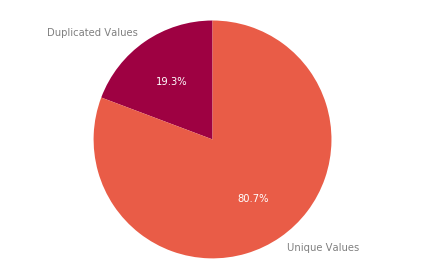

In [33]:
amount_of_duplicates = extentive_patient_df ["Random"].duplicated().sum()
print("Amount of duplicate values: ", amount_of_duplicates)

amount_of_unique = len(extentive_patient_df ) - amount_of_duplicates
print("Amount of unique values: ", amount_of_unique)

labels = 'Duplicated Values', 'Unique Values'
sizes = [amount_of_duplicates, amount_of_unique]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

Here we can see the distribution of duplicates in the `Random` column

This shows a quite substaination amount of duplicates. There are two options, either just drop the column or drop the duplicate rows. 

As there could be model training with this dataset it makes more sense just to drop the column.

#### 3.5.1 - Dropping duplicates in `Random` column

In [34]:
extentive_patient_df .drop("Random", axis=1, inplace = True)

Now to check if the drop has worked.

In [35]:
extentive_patient_df .head()

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality
0,218242,A-F,no,no,yes,no,no,78,20,NoRisk
1,159284,TIA,no,no,no,no,no,70,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95,40,Risk
3,229592,TIA,no,no,yes,no,no,90,85,Risk
4,245829,CVA,no,no,no,no,no,70,20,NoRisk


As seen, it has worked fine.

### 3.6 - Removal unnecessary columns

Some of the columns are unnecessary for data analysis. One of these columns is `Id`, as it is unnecessary for an identifier for data analysis. 

The other identifier `Random` has already been dropped, so the only other identifer is `Id` as its not necessary, it can be dropped also. 

In [36]:
extentive_patient_df .drop("Id", axis=1, inplace = True)

Now to check if the drop has worked

Which it has.

### 3.7 - Dummies and Mapping Columns to Integer Values

In [37]:
extentive_patient_df = pd.get_dummies(extentive_patient_df, columns = ["Indication"])

extentive_patient_df ["Diabetes"] = extentive_patient_df ["Diabetes"].map({"no":0, "yes":1})

extentive_patient_df ["IHD"] = extentive_patient_df ["IHD"].map({"no":0, "yes":1})

extentive_patient_df ["Hypertension"] = extentive_patient_df ["Hypertension"].map({"no":0, "yes":1})

extentive_patient_df ["Arrhythmia"] = extentive_patient_df ["Arrhythmia"].map({"no":0, "yes":1})

extentive_patient_df ["History"] = extentive_patient_df ["History"].map({"no":0, "yes":1})

extentive_patient_df ["Mortality"] = extentive_patient_df ["Mortality"].map({"NoRisk":0, "Risk":1})

So this replaces, or in this case maps the yes or no (and risk, no risk) to integer values. This quanifies the number of states the columns contain, such as yes or no, or risk, norisk ect.

The dummy converts the categorical data from `Indication` into dummy/indication variables, producing 4 different columns each for the 4 different values in `indication`

Also it allows the data to be visualised and modelled. For example `.corr()` only allows for numerical values, non-numerical values are ignored. Same with modeling. 

In [38]:
extentive_patient_df 

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA
0,0,0,1,0,0,78,20,0,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,0,1
2,0,1,1,0,0,95,40,1,1,0,0,0
3,0,0,1,0,0,90,85,1,0,0,0,1
4,0,0,0,0,0,70,20,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,76,60,0,1,0,0,0
1516,0,0,1,1,0,90,75,1,1,0,0,0
1517,0,0,1,0,0,75,20,0,0,0,0,1
1518,0,1,0,0,0,70,45,0,1,0,0,0


This shows that all values have been converted into integers and there are no issues with the mapping such as spaces in the values.

### 3.8 - Correlations

In [39]:
correlations = extentive_patient_df .corr()

correlations

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Mortality,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA
Diabetes,1.000000,0.064017,0.164368,0.095624,-0.002545,0.158694,0.188610,0.285510,-0.009462,0.036593,-0.050563,0.032132
IHD,0.064017,1.000000,0.137069,0.168570,-0.071391,0.090221,0.113951,0.252071,0.049031,0.017554,-0.002756,-0.063760
Hypertension,0.164368,0.137069,1.000000,0.289896,-0.073294,0.089246,0.113192,0.387746,-0.101607,0.060377,0.080493,-0.021376
Arrhythmia,0.095624,0.168570,0.289896,1.000000,0.003544,0.391332,0.496099,0.706442,0.043948,0.099263,0.128973,-0.257589
History,-0.002545,-0.071391,-0.073294,0.003544,1.000000,-0.000118,0.103961,-0.003921,-0.061189,-0.050040,0.000382,0.105230
IPSI,0.158694,0.090221,0.089246,0.391332,-0.000118,1.000000,0.317034,0.490566,0.151534,0.062849,-0.024505,-0.187714
Contra,0.188610,0.113951,0.113192,0.496099,0.103961,0.317034,1.000000,0.649821,-0.001670,0.020183,0.057459,-0.072738
Mortality,0.285510,0.252071,0.387746,0.706442,-0.003921,0.490566,0.649821,1.000000,0.117663,0.128898,-0.018023,-0.210995
Indication_A-F,-0.009462,0.049031,-0.101607,0.043948,-0.061189,0.151534,-0.001670,0.117663,1.000000,-0.285248,-0.424391,-0.410811
Indication_ASx,0.036593,0.017554,0.060377,0.099263,-0.050040,0.062849,0.020183,0.128898,-0.285248,1.000000,-0.250283,-0.242275


Here is all the correlations that the dataset produces. Although this is not very easy to see the correlations of the dataset, therefore it would be useful to create a heatmap. 

#### 3.8.1 - Heatmap of correlations

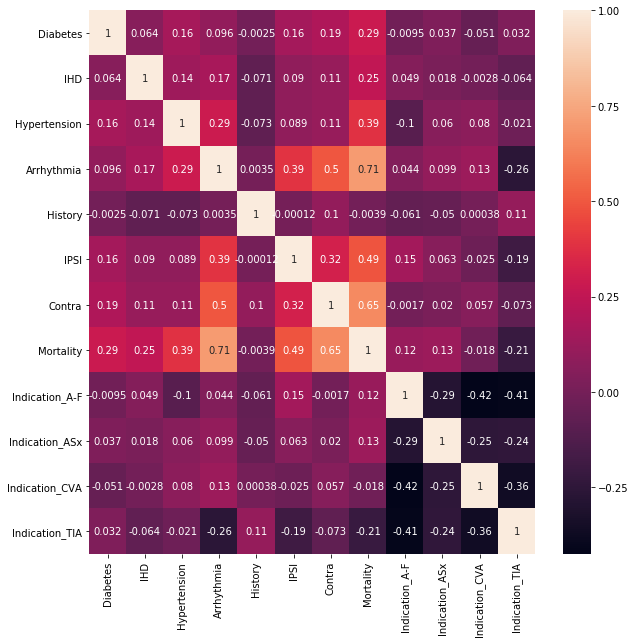

In [40]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True)
fig.savefig("heatmap.png")

This heatmap shows a visualisation of correlation, so this shows a high correlation of IPSI, Contra and Arrhythmia and a weak correlation to everything else. 

#### 3.8.2 - Pairplot showing correlation

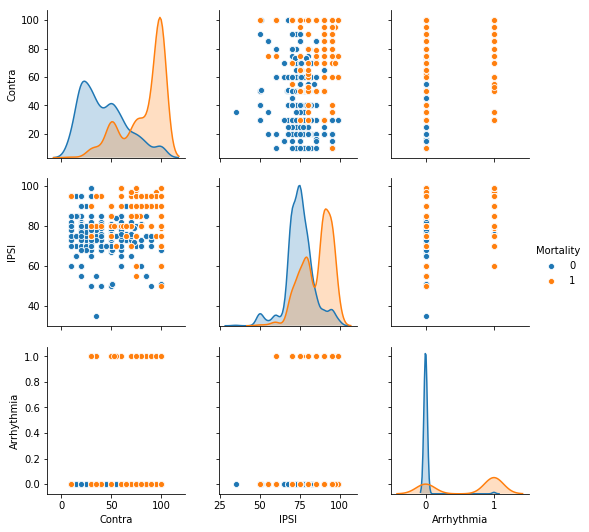

In [41]:
sns.pairplot(extentive_patient_df , vars=["Contra", "IPSI", "Arrhythmia"], hue="Mortality")

### Write something about this pairplot

### 3.9 - Outliers 

#### 3.9.1 - Visualising where the outliers are

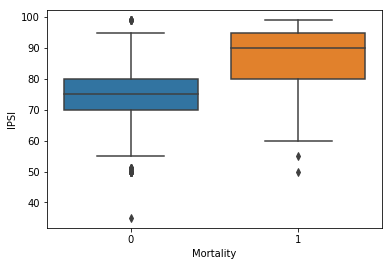

In [42]:
sns.boxplot(x = extentive_patient_df ['Mortality'], y = extentive_patient_df ["IPSI"])

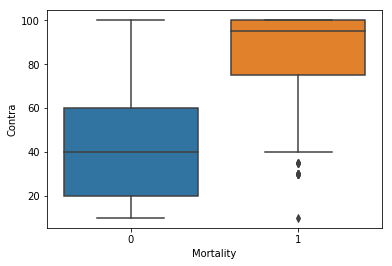

In [43]:
sns.boxplot(extentive_patient_df ['Mortality'], extentive_patient_df ['Contra'])

#### 3.9.2 - Finding the lower and higher interquile range

In [44]:
sorted_IPSI = sorted(extentive_patient_df ["IPSI"])
sorted_Contra = sorted(extentive_patient_df ["Contra"])

In [45]:
ipsi_quantile1, ipsi_quantile3 = np.percentile(sorted_IPSI,[25,75])
contra_quantile1, contra_quantile3 = np.percentile(sorted_Contra,[25,75])

In [46]:
print(ipsi_quantile1, ipsi_quantile3)
print(contra_quantile1, contra_quantile3)

73.0 85.0
30.0 85.0


#### 3.9.3 - Calculating the interquartile range

In [47]:
ipsi_iqr = ipsi_quantile3 - ipsi_quantile1
ipsi_lower_val = ipsi_quantile1 - (1.5 * ipsi_iqr)
ipsi_higher_val = ipsi_quantile3 + (1.5 * ipsi_iqr)

contra_iqr = contra_quantile3 - contra_quantile1
contra_lower_val = contra_quantile1 - (1.5 * contra_iqr)
contra_higher_val = contra_quantile3 + (1.5 * contra_iqr)

#### 3.9.4 - IPSI Outliers

Number of Outliers 40
Number of Non-outliers 1460


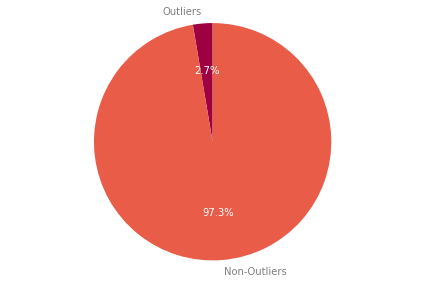

In [48]:
ipsi_outliers = ~extentive_patient_df ["IPSI"].between(ipsi_lower_val, ipsi_higher_val, inclusive=False)
ipsi_non_outliers = extentive_patient_df ["IPSI"].between(ipsi_lower_val, ipsi_higher_val, inclusive=False)

print("Number of Outliers", ipsi_outliers.sum())
print("Number of Non-outliers", ipsi_non_outliers.sum())

labels = 'Outliers', 'Non-Outliers'
sizes = [ipsi_outliers.sum() , ipsi_non_outliers.sum()]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

#### 3.9.5 - Contra Outliers

Number of Outliers 0
Number of Non-outliers 1500


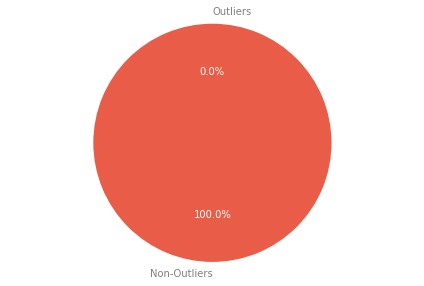

In [49]:
contra_outliers = ~extentive_patient_df ["Contra"].between(contra_lower_val, contra_higher_val, inclusive=False)
contra_non_outliers = extentive_patient_df ["Contra"].between(contra_lower_val, contra_higher_val, inclusive=False)

print("Number of Outliers", contra_outliers.sum())
print("Number of Non-outliers", contra_non_outliers.sum())


labels = 'Outliers', 'Non-Outliers'
sizes = [contra_outliers.sum(), contra_non_outliers.sum()]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]

patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.axis("equal")
plt.tight_layout()
plt.show()

#### 4.0.0 - Splitting Data 

The data is needed to be split into two dataframes, one that holds the training data, and the other the ext_cleaned_data data. 

So in this case, `data` is the training data, it has all the columns except `Mortality`, and the ext_cleaned_data data is just the `Mortality` column as it is necessary to predict a patient is at risk depending on the variables in `data`.

#### 4.1.0 - Splitting Minimally Cleaning Data

In [50]:
mini_cleaned_data = minimal_patient_df.loc[:, minimal_patient_df.columns != "label"]

In [51]:
mini_cleaned_data

,Random,Id,IPSI,Contra,Indication_A-F,Indication_ASx,Indication_Asx,Indication_CVA,Indication_TIA,Diabetes_no,Diabetes_yes,IHD_no,IHD_yes,Hypertension_no,Hypertension_yes,Arrhythmia_no,Arrhythmia_yes,History_no,History_yes
0,0.602437,218242,78.0,20.0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
1,0.602437,159284,70.0,60.0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
2,0.602437,106066,95.0,40.0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
3,0.128157,229592,90.0,85.0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0
4,0.676862,245829,70.0,20.0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,76.0,60.0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0
1516,0.253504,121814,90.0,75.0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0
1517,0.620373,101754,75.0,20.0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0
1518,0.639342,263836,70.0,45.0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [52]:
mini_cleaned_target = minimal_patient_df["label"]

In [53]:
mini_cleaned_target 

0       0
1       0
2       1
3       1
4       0
       ..
1515    0
1516    1
1517    0
1518    0
1519    0
Name: label, Length: 1500, dtype: int64

In [54]:
mini_data_train, mini_data_test, mini_target_train, mini_target_test = train_test_split(mini_cleaned_data, mini_cleaned_target, test_size = 0.3, shuffle=True)

In [55]:
print("70% of the data size", len(mini_data_train))
print("30% of the data size", len(mini_data_test))

70% of the data size 1050
30% of the data size 450


#### 4.2.0 - Splitting Extensively Cleaned Data

In [56]:
ext_cleaned_data = extentive_patient_df.loc[:, extentive_patient_df.columns != "Mortality"]

In [57]:
ext_cleaned_data

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA
0,0,0,1,0,0,78,20,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,1
2,0,1,1,0,0,95,40,1,0,0,0
3,0,0,1,0,0,90,85,0,0,0,1
4,0,0,0,0,0,70,20,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,76,60,1,0,0,0
1516,0,0,1,1,0,90,75,1,0,0,0
1517,0,0,1,0,0,75,20,0,0,0,1
1518,0,1,0,0,0,70,45,1,0,0,0


All but risk

In [58]:
ext_cleaned_target = extentive_patient_df["Mortality"]

In [59]:
ext_cleaned_target

0       0
1       0
2       1
3       1
4       0
       ..
1515    0
1516    1
1517    0
1518    0
1519    0
Name: Mortality, Length: 1500, dtype: int64

In [60]:
ext_data_train, ext_data_test, ext_target_train, ext_target_test = train_test_split(ext_cleaned_data, ext_cleaned_target, test_size = 0.3, shuffle=True)

In [61]:
print("70% of the data size", len(ext_data_train))
print("30% of the data size",len(ext_data_test))

70% of the data size 1050
30% of the data size 450


<center> <h2> 5.0.0 - Data Modeling </h2> </center>
<hr>

### 5.1.0 - Linear Regression

In [62]:
linear_regression = LinearRegression()

#### 5.1.1 - Minimally Cleaned Model


In [63]:
linear_regression.fit(mini_data_train, mini_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
mini_linear_pred = linear_regression.predict(mini_data_test)

In [65]:
mini_ls = linear_regression.score(mini_data_test, mini_target_test)

In [66]:
mini_linear_cv = cross_val_score(linear_regression, mini_cleaned_data, mini_cleaned_target, cv=10)

print("Cross Value: ", mini_linear_cv)

mini_var = variance(mini_linear_cv)
print("Variance: ", mini_var)

Cross Value:  [0.71844936 0.71892018 0.73909403 0.75293924 0.75147339 0.73020024
 0.68911297 0.70951451 0.7427129  0.72330308]
Variance:  0.0003961283744796034


#### 5.1.2 - Extensively Cleaned Model

In [67]:
linear_regression.fit(ext_data_train, ext_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
ext_linear_pred = linear_regression.predict(ext_data_test) 

In [69]:
ls = linear_regression.score(ext_data_test, ext_target_test)
ls

0.7467830858278395

In [70]:
ext_linear_cv = cross_val_score(linear_regression,ext_cleaned_data,ext_cleaned_target, cv = 10)
ext_linear_cv 

array([0.72126958, 0.71953297, 0.73666987, 0.75427672, 0.75131305,
       0.73010801, 0.6870661 , 0.71007622, 0.74422916, 0.7230254 ])

In [71]:
lr_var = variance(ext_linear_cv)
lr_var

0.0004127723383697322

Linear Regression isn't the best model for this data due to the fact that it requires constuous data, which this data set is not. Stock data or any data that has a time element would benefit from using a linear regression classifer. 

Hence why a confusion matrix cannot be created. `Classification metrics can't handle a mix of binary and continuous ext_cleaned_datas`

### 5.2.0 - Logistic Regression

In [72]:
logistic = LogisticRegression() 

#### 5.2.1 - Minimally Cleaned Model

In [73]:
logistic.fit(mini_data_train, mini_target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
mini_logistic_pred = logistic.predict(mini_data_test)

In [75]:
log_score = logistic.score(mini_data_test, mini_target_test)
log_score

0.8044444444444444

In [76]:
mini_logistic_cv = cross_val_score(logistic,mini_cleaned_data, mini_cleaned_target, cv = 10)
mini_logistic_cv

array([0.85333333, 0.77333333, 0.86      , 0.73333333, 0.8       ,
       0.78      , 0.80666667, 0.80666667, 0.80666667, 0.78666667])

In [77]:
log_var = variance(mini_logistic_cv)
log_var

0.0013674074074074085

Acc:  0.8044444444444444
Spec: 0.8310344827586207
Sens: 0.75625
Pres: 0.711764705882353


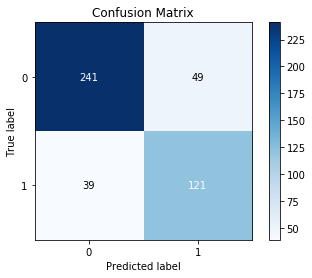

In [145]:
cm = confusion_matrix(mini_target_test, mini_logistic_pred)
tn, fp, fn, tp, = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

plot_confusion_matrix(mini_target_test, mini_logistic_pred)

#### 5.2.2 - Extensively Cleaned Model

In [79]:
logistic.fit(ext_data_train, ext_target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
logistic_pred = logistic.predict(ext_data_test)

In [81]:
logistic.score(ext_data_test, ext_target_test)

0.9555555555555556

In [82]:
logistic_cv = cross_val_score(logistic,ext_cleaned_data, ext_cleaned_target, cv = 10)

logistic_cv

array([0.95333333, 0.94666667, 0.96666667, 0.95333333, 0.96      ,
       0.94      , 0.92666667, 0.92666667, 0.96      , 0.92      ])

In [83]:
variance(logistic_cv)

0.00026469135802469133

Acc:  0.9555555555555556
Spec: 0.9726962457337884
Sens: 0.9235668789808917
Pres: 0.9477124183006536


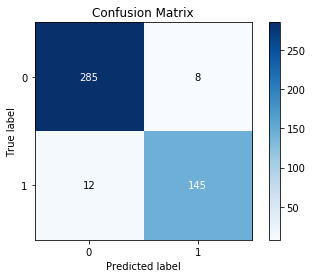

In [84]:
cm = confusion_matrix(ext_target_test, logistic_pred)
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

plot_confusion_matrix(ext_target_test, logistic_pred)

#### 5.2.2.1 - Extensive Cleaning Logistic regression with Hyperparameters

In [85]:
log_reg_params = LogisticRegression()

In [86]:
penalty = ['l1', 'l2'] # Most common solvers are l1 and l1

C = np.logspace(0,4,10) # returns numbers spaces evenly on a log scale
# 0 is start, 4 is stop and 10 is the number of samples to generate
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html
print(C)

log_hyperparams = dict(C=C, penalty=penalty)

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


In [87]:
grid_search = GridSearchCV(log_reg_params, log_hyperparams, cv=5, verbose=0)

In [88]:
grid_search_fit = grid_search.fit(ext_data_train, ext_target_train)

In [89]:
best_pen = grid_search_fit.best_estimator_.get_params()['penalty']
best_c = grid_search_fit.best_estimator_.get_params()['C']

print('Best Penalty:', best_pen)
print('Best C:', best_c)

Best Penalty: l1
Best C: 21.544346900318832


In [90]:
log_reg_params = LogisticRegression(C=best_c, penalty=best_pen)

In [91]:
log_reg_params.fit(ext_data_train, ext_target_train)

LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
log_reg_params_pred = log_reg_params.predict(ext_data_test)

In [93]:
log_reg_params.score(ext_data_test, ext_target_test)

0.98

In [94]:
log_reg_params_cv = cross_val_score(log_reg_params, ext_cleaned_data, ext_cleaned_target, cv=10)
log_reg_params_cv 

array([0.98666667, 0.97333333, 1.        , 0.96666667, 0.98666667,
       0.99333333, 0.95333333, 0.95333333, 0.99333333, 0.96      ])

In [95]:
variance(log_reg_params_cv)

0.0003086419753086415

Acc:  0.98
Spec: 0.9829351535836177
Sens: 0.9745222929936306
Pres: 0.9683544303797469


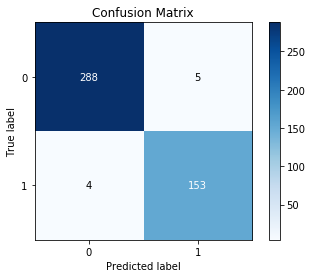

In [96]:
cm = confusion_matrix(ext_target_test, log_reg_params_pred)
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

 
plot_confusion_matrix(ext_target_test, log_reg_params_pred )

### 5.3.0 - Decision Tree

In [97]:
decision_tree_model = tree.DecisionTreeClassifier()

#### 5.3.1 - Minimally Cleaned Model

In [98]:
decision_tree_model.fit(mini_data_train, mini_target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
mini_dt_pred = decision_tree_model.predict(mini_data_test)

In [100]:
decision_tree_model.score(mini_data_test, mini_target_test)

0.9688888888888889

In [101]:
mini_dt_cv = cross_val_score(decision_tree_model,mini_cleaned_data, mini_cleaned_target, cv = 10)

mini_dt_cv

array([1.        , 0.94666667, 0.99333333, 0.97333333, 0.98666667,
       0.98      , 0.96666667, 0.97333333, 0.97333333, 0.98      ])

In [102]:
variance(mini_dt_cv)

0.00021925925925925905

Acc:  0.9688888888888889
Spec: 0.9827586206896551
Sens: 0.94375
Pres: 0.967948717948718


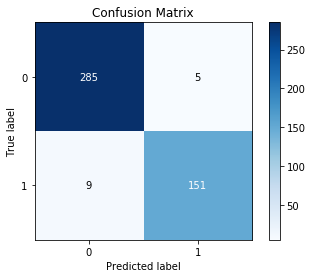

In [147]:
cm = confusion_matrix(mini_target_test, mini_dt_pred )
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

plot_confusion_matrix(mini_target_test, mini_dt_pred)

#### 5.3.2 - Extensively Cleaned Model

In [104]:
decision_tree_model.fit(ext_data_train, ext_target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
dt_pred = decision_tree_model.predict(ext_data_test)

In [106]:
decision_tree_model.score(ext_data_test, ext_target_test)

0.9911111111111112

In [107]:
dt_cross_val = cross_val_score(decision_tree_model,ext_cleaned_data, ext_cleaned_target, cv = 10)

dt_cross_val

array([1.        , 0.98      , 0.99333333, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 1.        , 0.98666667])

In [108]:
variance(dt_cross_val)

4.148148148148139e-05

Acc:  0.9911111111111112
Spec: 0.9897610921501706
Sens: 0.9936305732484076
Pres: 0.9811320754716981


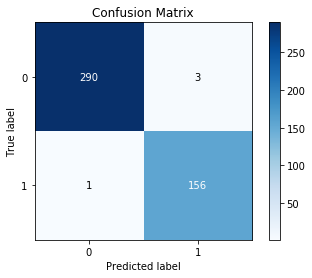

In [148]:
cm = confusion_matrix(ext_target_test, dt_pred )
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

plot_confusion_matrix(ext_target_test, dt_pred)

Looks like the decision tree classifer is overfitting, it should not be getting 100% accuracy on this dataset. Therefore hyperparams will be necessary to prune the tree.

#### 5.3.2.1 -  Extensive Cleaning Decision Tree

In [110]:
vis_tree = tree.export_graphviz(decision_tree_model, out_file=None, filled = True, rounded = True, special_characters=True)

In [111]:
graph = pydotplus.graph_from_dot_data(vis_tree)

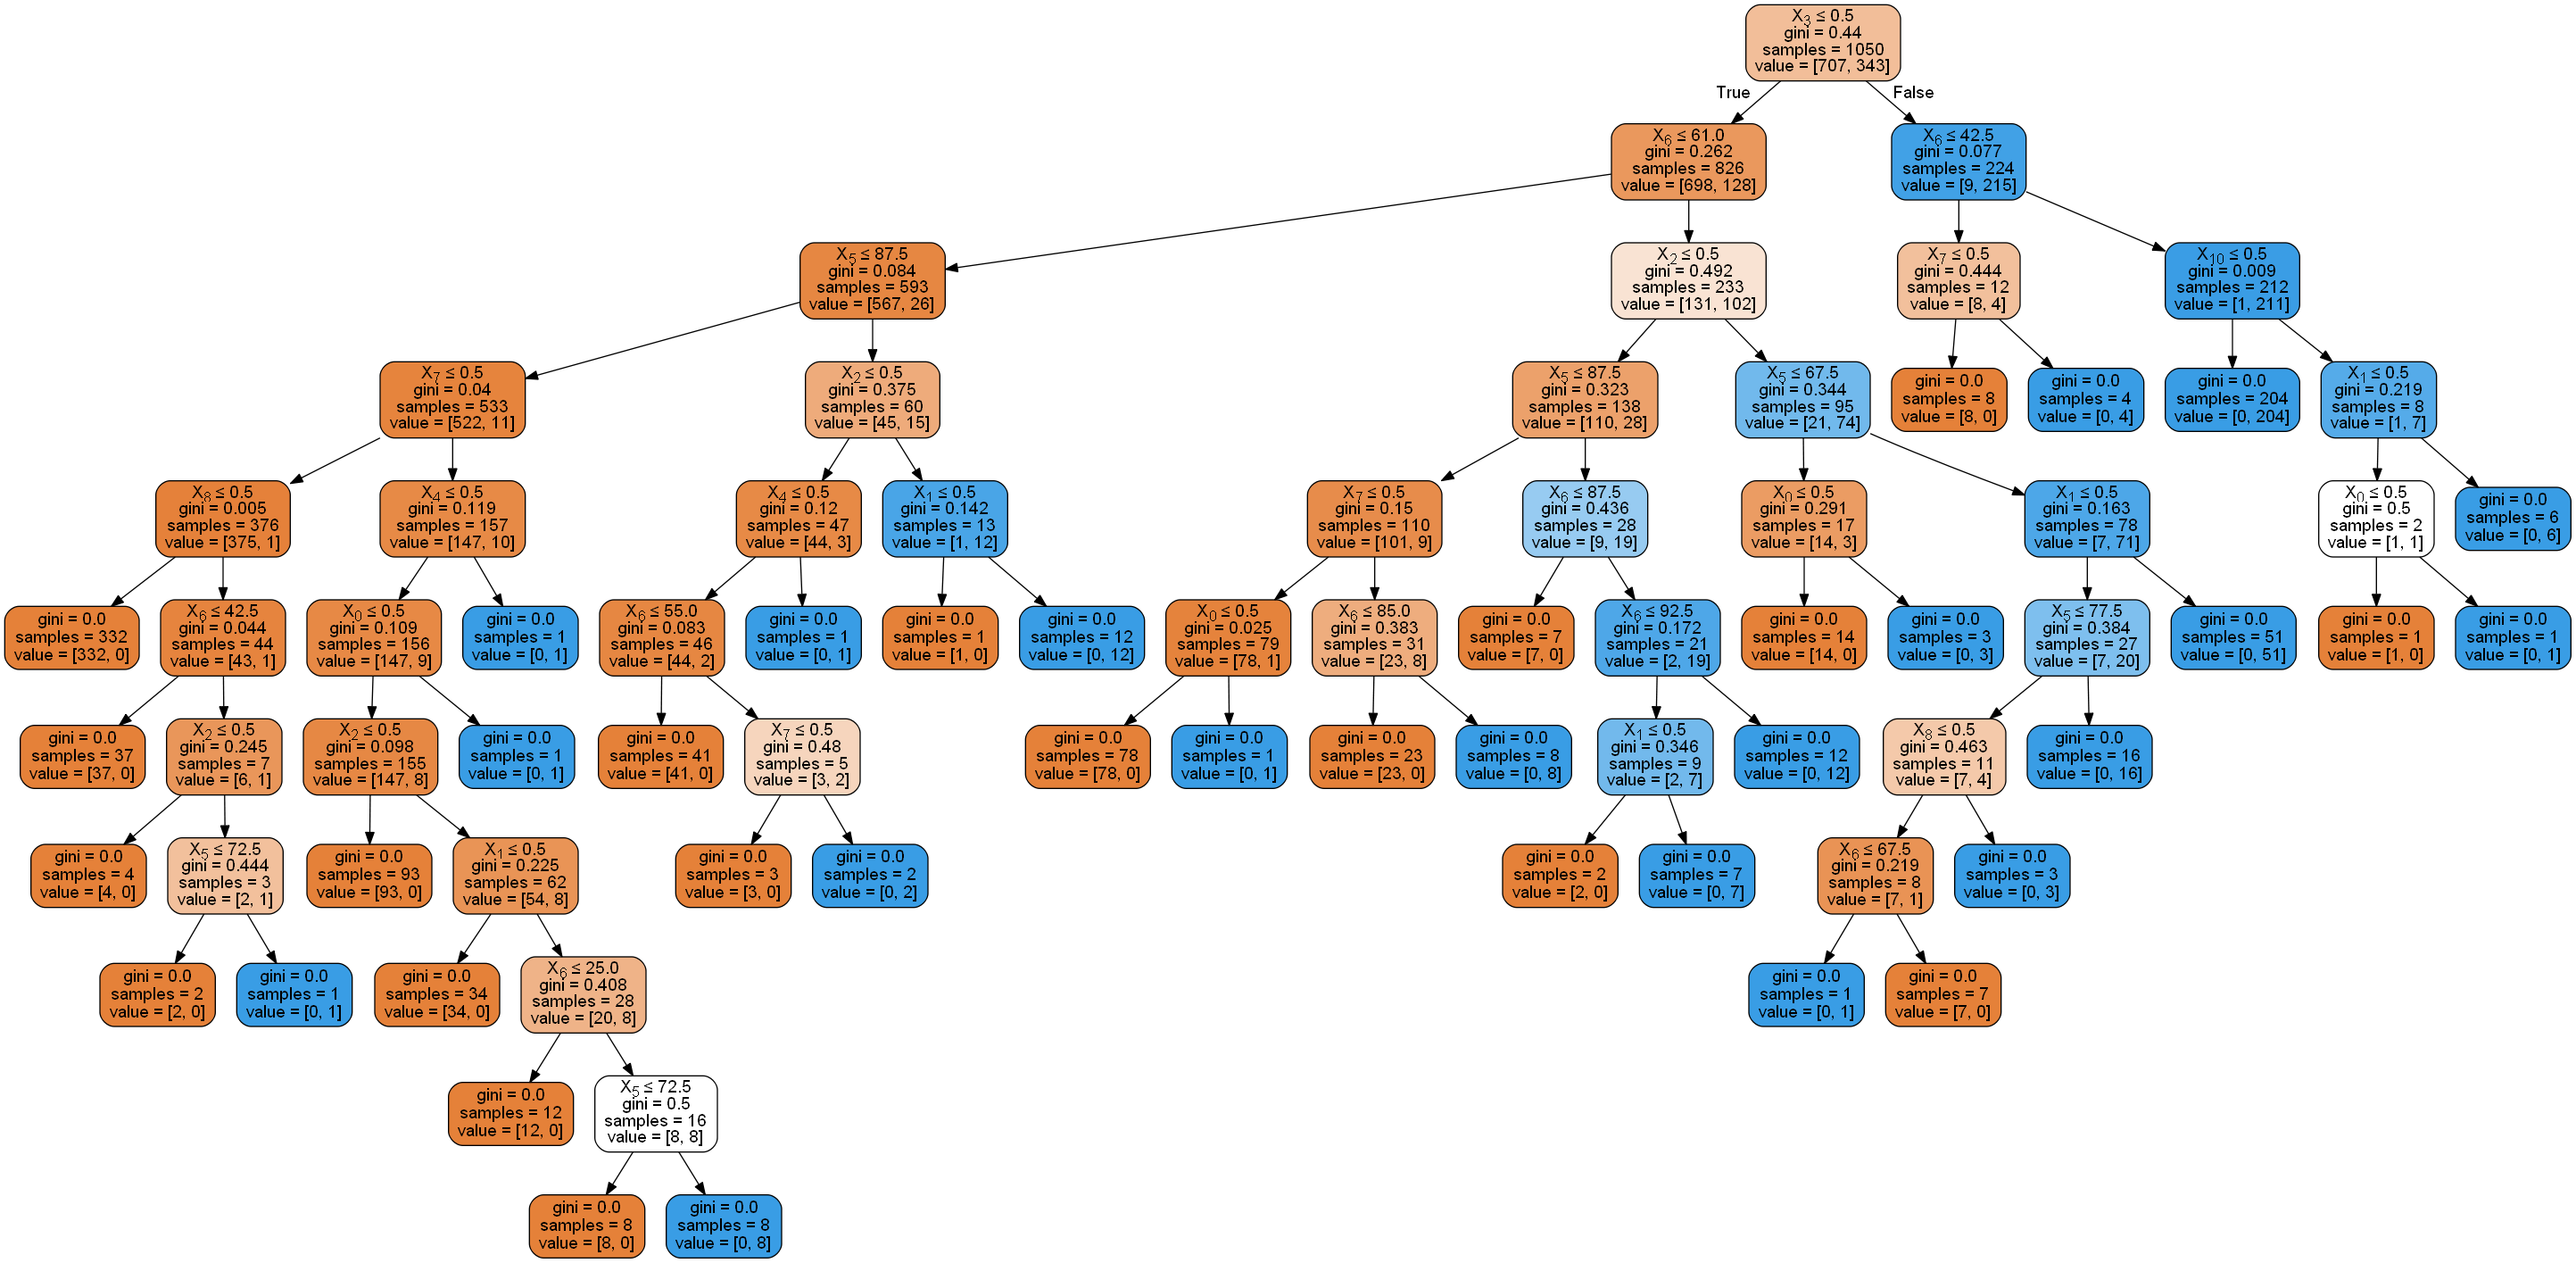

In [112]:
Image(graph.create_png())

#### 5.3.2.2 - Extensive Cleaning Decision Tree Pruned

In [113]:
dt_model_pruned = tree.DecisionTreeClassifier(max_leaf_nodes = 20, min_samples_leaf = 10, max_depth= 8)

In [114]:
dt_model_pruned.fit(ext_data_train, ext_target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
dt_pred_pruned = dt_model_pruned.predict(ext_data_test)

In [116]:
dt_model_pruned.score(ext_data_test, ext_target_test)

0.9511111111111111

In [117]:
dt_pruned_cv = cross_val_score(dt_model_pruned, ext_cleaned_data, ext_cleaned_target, cv = 10)
dt_pruned_cv

array([0.94666667, 0.89333333, 0.95333333, 0.93333333, 0.97333333,
       0.96      , 0.94      , 0.94666667, 0.96666667, 0.98      ])

In [118]:
variance(dt_pruned_cv)

0.0006044444444444449

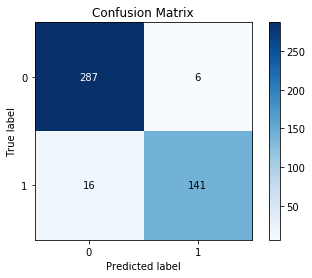

In [119]:
plot_confusion_matrix(ext_target_test, dt_pred_pruned)

In [120]:
graph.write_png("dtree_pruned.png")

True

#### 5.3.2.3 - Extensive Cleaning Pruned Decision Tree Visualisation

In [121]:
vis_ptree = tree.export_graphviz(dt_model_pruned, out_file=None, filled = True, rounded = True, special_characters=True)

In [122]:
graph_tree_pruned = pydotplus.graph_from_dot_data(vis_ptree)

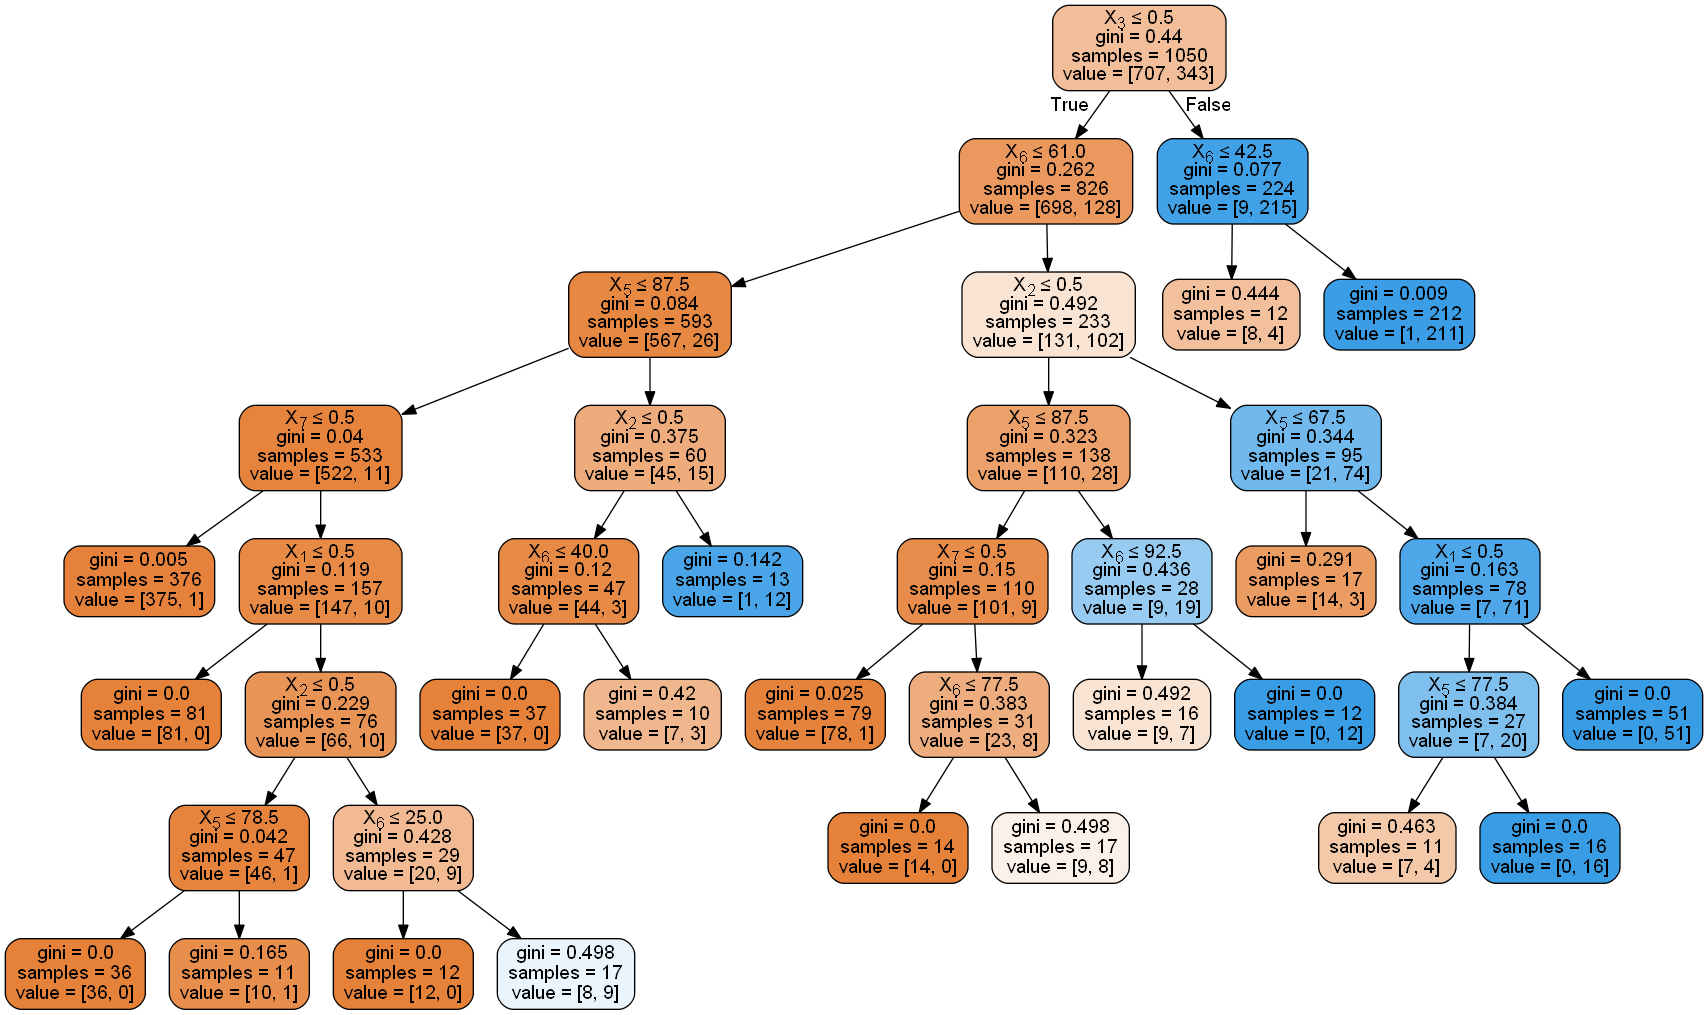

In [123]:
Image(graph_tree_pruned.create_png())

### Model 4: Support Vector Classification

In [124]:
svc_model = SVC()

In [125]:
svc_model.fit(ext_data_train, ext_target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
svc_pred = svc_model.predict(ext_data_test)

In [127]:
svc_model.score(ext_data_test, ext_target_test)

0.9555555555555556

In [128]:
svc_cv = cross_val_score(svc_model, ext_cleaned_data, ext_cleaned_target, cv = 10)
svc_cv

array([0.98666667, 0.9       , 0.99333333, 0.94      , 0.98      ,
       0.98      , 0.96666667, 0.95333333, 0.99333333, 0.99333333])

In [129]:
variance(svc_cv)

0.0009091358024691349

Acc:  0.9555555555555556
Spec: 0.9897610921501706
Sens: 0.89171974522293
Pres: 0.9790209790209791


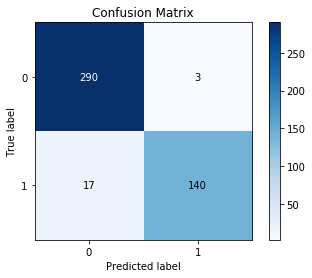

In [152]:
cm = confusion_matrix(ext_target_test, svc_pred )
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))

plot_confusion_matrix(ext_target_test, svc_pred)

### Model 5: Multi-layered Perceptron

In [131]:
mlp_model = MLPClassifier()

In [132]:
mlp_model.fit(ext_data_train, ext_target_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [133]:
mlp_pred = mlp_model.predict(ext_data_test)

In [134]:
mlp_model.score(ext_data_test, ext_target_test)

0.9288888888888889

In [135]:
mlp_model_cv = cross_val_score(mlp_model, ext_cleaned_data, ext_cleaned_target, cv = 10)
mlp_model_cv

array([0.95333333, 0.94666667, 0.98      , 0.92      , 0.94666667,
       0.94      , 0.94      , 0.9       , 0.96      , 0.93333333])

In [136]:
variance(mlp_model_cv)

0.0004745679012345673

Acc:  0.9288888888888889
Spec: 0.9692832764505119
Sens: 0.8535031847133758
Pres: 0.9370629370629371


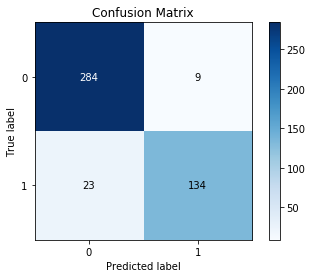

In [153]:
cm = confusion_matrix(ext_target_test, mlp_pred )
tn, fp, fn, tp = cm.ravel()

accuracy  = print("Acc: ", ((tp + tn) / (tp+tn+fp+fn)))
spec = print("Spec:", tn /(tn+fp))
sens = print("Sens:", tp/(tp+fn))
precision = print("Pres:" ,tp/(tp+fp))


plot_confusion_matrix(ext_target_test, mlp_pred)

#### Multilayered Perceptron with Hyperparams

In [138]:
mlp_model_params = MLPClassifier(solver='adam', random_state=3)

In [139]:
mlp_model_params.fit(ext_data_train, ext_target_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
mlp_pred_params = mlp_model.predict(ext_data_test)

In [141]:
mlp_model_params.score(ext_data_test, ext_target_test)

0.9311111111111111

In [142]:
mlp_model_params_cv = cross_val_score(mlp_model_params, ext_cleaned_data, ext_cleaned_target, cv = 10)
mlp_model_params_cv

array([0.98      , 0.96      , 0.96      , 0.90666667, 0.96      ,
       0.96      , 0.94      , 0.92      , 0.95333333, 0.94      ])

In [143]:
variance(mlp_model_params_cv)

0.0004720987654320987